### Analysis for WomenTechWomenYes (WTWY) annual gala 


- Street teams will be placed at entrances to subway stations.
- Street teams will be collecing email adresses.
- Those who sign up are sent free tickets to the gala.
- Placement of street teams at entrances to subway stations will be determined according to MTA data analysis. 

#### Step 1: Cleaning and importing data from http://web.mta.info/developers/turnstile.html

- The data is collected from June 1, 2019 - June 28, 2019


In [55]:
from __future__ import print_function, division

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [57]:
import datetime

In [58]:
# Source: http://web.mta.info/developers/turnstile.html
def get_data(week_nums):
    url = "http://web.mta.info/developers/data/nyct/turnstile/turnstile_{}.txt"
    dfs = []
    for week_num in week_nums:
        file_url = url.format(week_num)
        dfs.append(pd.read_csv(file_url))
    return pd.concat(dfs)
        
week_nums = [190629, 190622, 190615, 190608]
turnstiles_df = get_data(week_nums)

In [59]:
turnstiles_df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/22/2019,00:00:00,REGULAR,7107725,2407457
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/22/2019,04:00:00,REGULAR,7107738,2407465
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/22/2019,08:00:00,REGULAR,7107761,2407491
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/22/2019,12:00:00,REGULAR,7107858,2407541
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/22/2019,16:00:00,REGULAR,7108075,2407581


In [60]:
turnstiles_df.columns = [column.strip() for column in turnstiles_df.columns]
turnstiles_df.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES', 'EXITS'],
      dtype='object')

In [61]:
turnstiles_df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/22/2019,00:00:00,REGULAR,7107725,2407457
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/22/2019,04:00:00,REGULAR,7107738,2407465
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/22/2019,08:00:00,REGULAR,7107761,2407491
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/22/2019,12:00:00,REGULAR,7107858,2407541
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/22/2019,16:00:00,REGULAR,7108075,2407581


In [62]:
#4 weeks of data
turnstiles_df.DATE.value_counts().sort_index()

06/01/2019    29066
06/02/2019    28968
06/03/2019    30022
06/04/2019    29513
06/05/2019    29484
06/06/2019    29213
06/07/2019    28745
06/08/2019    29030
06/09/2019    29133
06/10/2019    29351
06/11/2019    29113
06/12/2019    30023
06/13/2019    29276
06/14/2019    29008
06/15/2019    29605
06/16/2019    29322
06/17/2019    29421
06/18/2019    29599
06/19/2019    29614
06/20/2019    29556
06/21/2019    30360
06/22/2019    29217
06/23/2019    29170
06/24/2019    29479
06/25/2019    29437
06/26/2019    29417
06/27/2019    29464
06/28/2019    29779
Name: DATE, dtype: int64

In [63]:
from datetime import datetime as dt

In [64]:
# Take the date and time fields into a single datetime column
turnstiles_df["DATE_TIME"] = pd.to_datetime(turnstiles_df.DATE + " " + turnstiles_df.TIME, 
                                            format="%m/%d/%Y %H:%M:%S")

In [65]:
turnstiles_df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/22/2019,00:00:00,REGULAR,7107725,2407457,2019-06-22 00:00:00
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/22/2019,04:00:00,REGULAR,7107738,2407465,2019-06-22 04:00:00
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/22/2019,08:00:00,REGULAR,7107761,2407491,2019-06-22 08:00:00
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/22/2019,12:00:00,REGULAR,7107858,2407541,2019-06-22 12:00:00
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/22/2019,16:00:00,REGULAR,7108075,2407581,2019-06-22 16:00:00


In [66]:
# Sanity Check to verify that "C/A", "UNIT", "SCP", "STATION", "DATE_TIME" is unique
(turnstiles_df
 .groupby(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"])
 .ENTRIES.count()
 .reset_index()
 .sort_values("ENTRIES", ascending=False)).head(20)

,C/A,UNIT,SCP,STATION,DATE_TIME,ENTRIES
583293,R174,R034,00-00-03,125 ST,2019-06-08 00:00:00,2
194099,N045,R187,01-00-02,81 ST-MUSEUM,2019-06-01 17:00:00,2
193942,N045,R187,01-00-01,81 ST-MUSEUM,2019-06-02 17:00:00,2
194324,N045,R187,01-06-00,81 ST-MUSEUM,2019-06-11 21:00:00,2
660217,R249,R179,01-05-00,86 ST,2019-06-27 00:00:00,2
679477,R290,R161,00-00-00,KINGSBRIDGE RD,2019-06-07 05:00:00,2
660221,R249,R179,01-05-00,86 ST,2019-06-27 04:00:00,2
583125,R174,R034,00-00-02,125 ST,2019-06-08 00:00:00,2
193937,N045,R187,01-00-01,81 ST-MUSEUM,2019-06-01 17:00:00,2
194104,N045,R187,01-00-02,81 ST-MUSEUM,2019-06-02 17:00:00,2


In [67]:
# On 9/16, we seem to have two entries for same time.  Let's take a look
mask = ((turnstiles_df["C/A"] == "N045") & 
(turnstiles_df["UNIT"] == "R187") & 
(turnstiles_df["SCP"] == "01-00-00") & 
(turnstiles_df["STATION"] == "81 ST-MUSEUM") &
(turnstiles_df["DATE_TIME"].dt.date == datetime.datetime(2019, 6, 1).date()))
turnstiles_df[mask].head(10)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME
48238,N045,R187,01-00-00,81 ST-MUSEUM,BC,IND,06/01/2019,01:00:00,REGULAR,5253270,6696487,2019-06-01 01:00:00
48239,N045,R187,01-00-00,81 ST-MUSEUM,BC,IND,06/01/2019,05:00:00,REGULAR,5253277,6696494,2019-06-01 05:00:00
48240,N045,R187,01-00-00,81 ST-MUSEUM,BC,IND,06/01/2019,09:00:00,REGULAR,5253280,6696548,2019-06-01 09:00:00
48241,N045,R187,01-00-00,81 ST-MUSEUM,BC,IND,06/01/2019,13:00:00,REGULAR,5253356,6696877,2019-06-01 13:00:00
48242,N045,R187,01-00-00,81 ST-MUSEUM,BC,IND,06/01/2019,17:00:00,REGULAR,5253806,6697182,2019-06-01 17:00:00
48243,N045,R187,01-00-00,81 ST-MUSEUM,BC,IND,06/01/2019,17:00:00,RECOVR AUD,5253801,6697182,2019-06-01 17:00:00
48244,N045,R187,01-00-00,81 ST-MUSEUM,BC,IND,06/01/2019,21:00:00,REGULAR,5254017,6697270,2019-06-01 21:00:00


In [68]:
# Get rid of the duplicate entry
turnstiles_df.sort_values(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"], 
                          inplace=True, ascending=False)
turnstiles_df.drop_duplicates(subset=["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"], inplace=True)

In [69]:
# Sanity Check to verify that "C/A", "UNIT", "SCP", "STATION", "DATE_TIME" is unique
(turnstiles_df
 .groupby(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"])
 .ENTRIES.count()
 .reset_index()
 .sort_values("ENTRIES", ascending=False)).head()

,C/A,UNIT,SCP,STATION,DATE_TIME,ENTRIES
0,A002,R051,02-00-00,59 ST,2019-06-01 00:00:00,1
548916,R139,R031,04-00-01,34 ST-PENN STA,2019-06-28 12:00:00,1
548906,R139,R031,04-00-01,34 ST-PENN STA,2019-06-26 20:00:00,1
548907,R139,R031,04-00-01,34 ST-PENN STA,2019-06-27 00:00:00,1
548908,R139,R031,04-00-01,34 ST-PENN STA,2019-06-27 04:00:00,1


In [70]:
# Drop Exits and Desc Column.  To prevent errors in multiple run of cell, errors on drop is ignored
turnstiles_df = turnstiles_df.drop(["EXITS", "DESC"], axis=1, errors="ignore")

In [71]:
turnstiles_daily = (turnstiles_df
                        .groupby(["C/A", "UNIT", "SCP", "STATION", "DATE"],as_index=False)
                        .ENTRIES.first())

In [72]:
turnstiles_daily.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES
0,A002,R051,02-00-00,59 ST,06/01/2019,7080817
1,A002,R051,02-00-00,59 ST,06/02/2019,7081567
2,A002,R051,02-00-00,59 ST,06/03/2019,7082949
3,A002,R051,02-00-00,59 ST,06/04/2019,7084565
4,A002,R051,02-00-00,59 ST,06/05/2019,7086109


In [73]:
turnstiles_daily[["PREV_DATE", "PREV_ENTRIES"]] = (turnstiles_daily
                                                       .groupby(["C/A", "UNIT", "SCP", "STATION"])["DATE", "ENTRIES"]
                                                       .transform(lambda grp: grp.shift(1)))

In [74]:
turnstiles_daily.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES
0,A002,R051,02-00-00,59 ST,06/01/2019,7080817,NaN,NaN
1,A002,R051,02-00-00,59 ST,06/02/2019,7081567,06/01/2019,7080817.0
2,A002,R051,02-00-00,59 ST,06/03/2019,7082949,06/02/2019,7081567.0
3,A002,R051,02-00-00,59 ST,06/04/2019,7084565,06/03/2019,7082949.0
4,A002,R051,02-00-00,59 ST,06/05/2019,7086109,06/04/2019,7084565.0


In [75]:
turnstiles_daily.tail()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES
136146,TRAM2,R469,00-05-01,RIT-ROOSEVELT,06/24/2019,5554,06/23/2019,5554.0
136147,TRAM2,R469,00-05-01,RIT-ROOSEVELT,06/25/2019,5554,06/24/2019,5554.0
136148,TRAM2,R469,00-05-01,RIT-ROOSEVELT,06/26/2019,5554,06/25/2019,5554.0
136149,TRAM2,R469,00-05-01,RIT-ROOSEVELT,06/27/2019,5554,06/26/2019,5554.0
136150,TRAM2,R469,00-05-01,RIT-ROOSEVELT,06/28/2019,5554,06/27/2019,5554.0


In [76]:
# Drop the rows for the earliest date in the df
turnstiles_daily.dropna(subset=["PREV_DATE"], axis=0, inplace=True)

In [77]:
turnstiles_daily.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES
1,A002,R051,02-00-00,59 ST,06/02/2019,7081567,06/01/2019,7080817.0
2,A002,R051,02-00-00,59 ST,06/03/2019,7082949,06/02/2019,7081567.0
3,A002,R051,02-00-00,59 ST,06/04/2019,7084565,06/03/2019,7082949.0
4,A002,R051,02-00-00,59 ST,06/05/2019,7086109,06/04/2019,7084565.0
5,A002,R051,02-00-00,59 ST,06/06/2019,7087657,06/05/2019,7086109.0


In [78]:
#create mask for the positive entries to delete neg entries from df. Roughly 1% of data.
positive_entries_mask = turnstiles_daily["ENTRIES"] > turnstiles_daily["PREV_ENTRIES"]
positive_entries_mask

1          True
2          True
3          True
4          True
5          True
6          True
7          True
8          True
9          True
10         True
11         True
12         True
13         True
14         True
15         True
16         True
17         True
18         True
19         True
20         True
21         True
22         True
23         True
24         True
25         True
26         True
27         True
29         True
30         True
31         True
          ...  
136120    False
136121    False
136122    False
136123    False
136125    False
136126    False
136127    False
136128    False
136129    False
136130    False
136131    False
136132    False
136133    False
136134    False
136135    False
136136    False
136137    False
136138    False
136139    False
136140    False
136141    False
136142    False
136143    False
136144    False
136145    False
136146    False
136147    False
136148    False
136149    False
136150    False
Length: 131260, dtype: b

In [79]:
#applied mask, this should only have positive counters. Daily data is CLEAN!
turnstiles_daily = turnstiles_daily[positive_entries_mask]
turnstiles_daily

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES
1,A002,R051,02-00-00,59 ST,06/02/2019,7081567,06/01/2019,7080817.0
2,A002,R051,02-00-00,59 ST,06/03/2019,7082949,06/02/2019,7081567.0
3,A002,R051,02-00-00,59 ST,06/04/2019,7084565,06/03/2019,7082949.0
4,A002,R051,02-00-00,59 ST,06/05/2019,7086109,06/04/2019,7084565.0
5,A002,R051,02-00-00,59 ST,06/06/2019,7087657,06/05/2019,7086109.0
6,A002,R051,02-00-00,59 ST,06/07/2019,7089268,06/06/2019,7087657.0
7,A002,R051,02-00-00,59 ST,06/08/2019,7090115,06/07/2019,7089268.0
8,A002,R051,02-00-00,59 ST,06/09/2019,7090874,06/08/2019,7090115.0
9,A002,R051,02-00-00,59 ST,06/10/2019,7092269,06/09/2019,7090874.0
10,A002,R051,02-00-00,59 ST,06/11/2019,7093803,06/10/2019,7092269.0


In [80]:
def get_daily_counts(row, max_counter):
    counter = row["ENTRIES"] - row["PREV_ENTRIES"]
    
        # Maybe counter is reversed?
    if counter > max_counter:
        print(row["ENTRIES"], row["PREV_ENTRIES"])
        counter = min(row["ENTRIES"], row["PREV_ENTRIES"])
    if counter > max_counter:
        # Check it again to make sure we are not giving a counter that's too big
        return 0
    return counter

# If counter is > 1Million, then the counter might have been reset.  
# Just set it to zero as different counters have different cycle limits
turnstiles_daily["DAILY_ENTRIES"] = turnstiles_daily.apply(get_daily_counts, axis=1, max_counter=800000)

1376283 8703.0
7246468 4050451.0
852339 658.0
1828703861 9687851.0
452993419 1830432.0
704681758 2758310.0
868286381 101740072.0


In [81]:
pass

In [82]:
turnstiles_daily.sort_values('DAILY_ENTRIES',ascending=False)

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES,DAILY_ENTRIES
120709,R501,R054,00-06-01,5 AVE,06/08/2019,136172668,06/02/2019,136157920.0,14748.0
120525,R501,R054,00-00-01,5 AVE,06/08/2019,3414803,06/02/2019,3401021.0,13782.0
120548,R501,R054,00-00-02,5 AVE,06/08/2019,991388435,06/02/2019,991377089.0,11346.0
106062,R238A,R046,02-03-01,GRD CNTRL-42 ST,06/18/2019,1690214,06/17/2019,1679230.0,10984.0
106006,R238A,R046,02-00-04,GRD CNTRL-42 ST,06/18/2019,2801644,06/17/2019,2791322.0,10322.0
106061,R238A,R046,02-03-01,GRD CNTRL-42 ST,06/17/2019,1679230,06/16/2019,1669158.0,10072.0
106013,R238A,R046,02-00-04,GRD CNTRL-42 ST,06/25/2019,2859055,06/24/2019,2849215.0,9840.0
105978,R238A,R046,02-00-03,GRD CNTRL-42 ST,06/18/2019,1857402,06/17/2019,1847577.0,9825.0
106001,R238A,R046,02-00-04,GRD CNTRL-42 ST,06/13/2019,2764054,06/12/2019,2754409.0,9645.0
105999,R238A,R046,02-00-04,GRD CNTRL-42 ST,06/11/2019,2744965,06/10/2019,2735367.0,9598.0


In [83]:
turnstiles_daily.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES,DAILY_ENTRIES
1,A002,R051,02-00-00,59 ST,06/02/2019,7081567,06/01/2019,7080817.0,750.0
2,A002,R051,02-00-00,59 ST,06/03/2019,7082949,06/02/2019,7081567.0,1382.0
3,A002,R051,02-00-00,59 ST,06/04/2019,7084565,06/03/2019,7082949.0,1616.0
4,A002,R051,02-00-00,59 ST,06/05/2019,7086109,06/04/2019,7084565.0,1544.0
5,A002,R051,02-00-00,59 ST,06/06/2019,7087657,06/05/2019,7086109.0,1548.0


In [84]:
turnstiles_daily['WEEK'] = pd.to_datetime(turnstiles_daily['DATE']).dt.day_name()
turnstiles_daily.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES,DAILY_ENTRIES,WEEK
1,A002,R051,02-00-00,59 ST,06/02/2019,7081567,06/01/2019,7080817.0,750.0,Sunday
2,A002,R051,02-00-00,59 ST,06/03/2019,7082949,06/02/2019,7081567.0,1382.0,Monday
3,A002,R051,02-00-00,59 ST,06/04/2019,7084565,06/03/2019,7082949.0,1616.0,Tuesday
4,A002,R051,02-00-00,59 ST,06/05/2019,7086109,06/04/2019,7084565.0,1544.0,Wednesday
5,A002,R051,02-00-00,59 ST,06/06/2019,7087657,06/05/2019,7086109.0,1548.0,Thursday


In [85]:
#This DF finds the TOTAL entries per day, out of 4 weeks of data
turnstiles_daily_agg = (turnstiles_daily[['STATION','DATE','DAILY_ENTRIES','WEEK']]
                        .groupby('WEEK')
                        .sum()
                        .sort_values('DAILY_ENTRIES',ascending=False)
                       )
#MVP 
turnstiles_daily_agg.reset_index()

,WEEK,DAILY_ENTRIES
0,Wednesday,24146457.0
1,Thursday,23689416.0
2,Tuesday,23118704.0
3,Friday,23115087.0
4,Monday,22206465.0
5,Sunday,10958289.0
6,Saturday,10567552.0


In [86]:
#Dividing of all the weekdays by 4, since we use 4 weeks of data 
turnstiles_daily_agg_trial = turnstiles_daily_agg.iloc[:]/4

In [87]:
#Diving Saturday by 4/3 since we only have 3 Saturdays by the given period
turnstiles_daily_agg_trial.loc['Saturday'] = turnstiles_daily_agg_trial.loc['Saturday']*4/3

In [88]:
#MVP for viz 1. This DF has average entries per week day in the last month.
turnstiles_daily_agg_trial

,DAILY_ENTRIES
WEEK,
Wednesday,6.036614e+06
Thursday,5.922354e+06
Tuesday,5.779676e+06
Friday,5.778772e+06
Monday,5.551616e+06
Sunday,2.739572e+06
Saturday,3.522517e+06


In [89]:
turnstiles_daily_agg_trial['byMil'] = (turnstiles_daily_agg_trial['DAILY_ENTRIES']/1000000).round(decimals=3)
turnstiles_daily_agg_trial.reset_index()
turnstiles_daily_agg_trial.drop(columns='DAILY_ENTRIES',inplace=True)
turnstiles_daily_agg_trial

,byMil
WEEK,
Wednesday,6.037
Thursday,5.922
Tuesday,5.780
Friday,5.779
Monday,5.552
Sunday,2.740
Saturday,3.523


### EDA Visualizations 

#### EDA 1: Average traffic per week day for the period of June 1, 2019 - June 28, 2018

In [90]:
import seaborn as sns

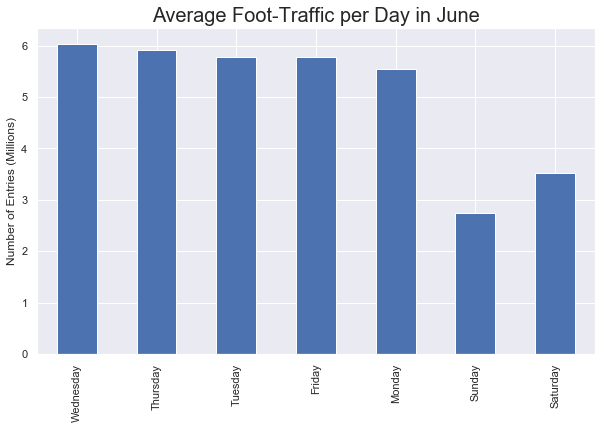

In [91]:
# average traffic per day in the last month
base_color = sns.color_palette()[0]
sns.set(style="darkgrid")
g = turnstiles_daily_agg_trial.plot(kind='bar',figsize=(10,6),color=base_color)
plt.title('Average Foot-Traffic per Day in June',fontdict={'fontsize':20})
plt.xlabel('')
g.get_legend().remove()
plt.ylabel('Number of Entries (Millions)');

#### Observatiions:
- Wednesdays has the highest traffic of daily entries on average. 
- The best days to collect signatures will be Wednesdays, Thursdays, Tuesdays, and Fridays.
- The worst day to collect signatures will will be Sunday. 

### EDA 2 : Busiest station in NYC

In [92]:
#test
turnstiles_daily.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES,DAILY_ENTRIES,WEEK
1,A002,R051,02-00-00,59 ST,06/02/2019,7081567,06/01/2019,7080817.0,750.0,Sunday
2,A002,R051,02-00-00,59 ST,06/03/2019,7082949,06/02/2019,7081567.0,1382.0,Monday
3,A002,R051,02-00-00,59 ST,06/04/2019,7084565,06/03/2019,7082949.0,1616.0,Tuesday
4,A002,R051,02-00-00,59 ST,06/05/2019,7086109,06/04/2019,7084565.0,1544.0,Wednesday
5,A002,R051,02-00-00,59 ST,06/06/2019,7087657,06/05/2019,7086109.0,1548.0,Thursday


In [93]:
#grouping data by stations and data to find a sum of daily entries
stations_daily = \
(turnstiles_daily.groupby(['STATION','DATE'])['DAILY_ENTRIES'].sum()
                 .reset_index())  

stations_daily.head()

,STATION,DATE,DAILY_ENTRIES
0,1 AV,06/02/2019,5803.0
1,1 AV,06/03/2019,17040.0
2,1 AV,06/04/2019,17433.0
3,1 AV,06/05/2019,19434.0
4,1 AV,06/06/2019,18639.0


In [94]:
#grouping the same data above by stations to find of a sum of daily entires for top 10 stations 
top10_stations = (stations_daily.groupby(['STATION'])['DAILY_ENTRIES'].sum()
                   .reset_index()
                   .sort_values(by='DAILY_ENTRIES',ascending=False) 
                   .STATION.head(10))

top10_stations

61      34 ST-PENN STA
232    GRD CNTRL-42 ST
59     34 ST-HERALD SQ
46               23 ST
352     TIMES SQ-42 ST
14      14 ST-UNION SQ
225          FULTON ST
68     42 ST-PORT AUTH
110              86 ST
172           CANAL ST
Name: STATION, dtype: object

In [95]:
#changing the format to data frame 
stations_daily_top10 = \
    stations_daily[stations_daily['STATION'].isin(top10_stations)]

Text(0.5, 1.0, 'Top 10 busiest stations')

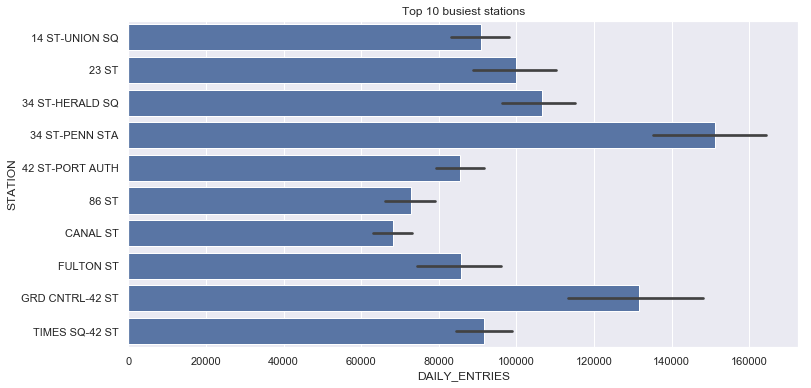

In [96]:
plt.figure(figsize=(12,6))
sns.barplot(data=stations_daily_top10, x ='DAILY_ENTRIES',y='STATION',color=base_color)
plt.title('Top 10 busiest stations')

#### Observations:

- The figure above represents top 10 busiest stations in NYC. 
- The busiest station in NYC is 34 ST-PENN STA.
- Street team should be placed at the enterances of those staions. 

### EDA 3: Distribution of daily entries in June

In [97]:
# grouping data by date to find a sum of daily entries 
byDate = turnstiles_daily.groupby('DATE')['DAILY_ENTRIES'].sum().reset_index()

In [98]:
byDate['byMil'] = (byDate['DAILY_ENTRIES']/1000000).round(decimals=3)

In [99]:
byDate

,DATE,DAILY_ENTRIES,byMil
0,06/02/2019,2737778.0,2.738
1,06/03/2019,5649155.0,5.649
2,06/04/2019,5683109.0,5.683
3,06/05/2019,6004954.0,6.005
4,06/06/2019,5895034.0,5.895
5,06/07/2019,5801584.0,5.802
6,06/08/2019,3598032.0,3.598
7,06/09/2019,2807193.0,2.807
8,06/10/2019,5408431.0,5.408
9,06/11/2019,5826174.0,5.826


In [100]:
x_labels = ['06/05/2019','06/12/2019','06/19/2019','06/26/2019']

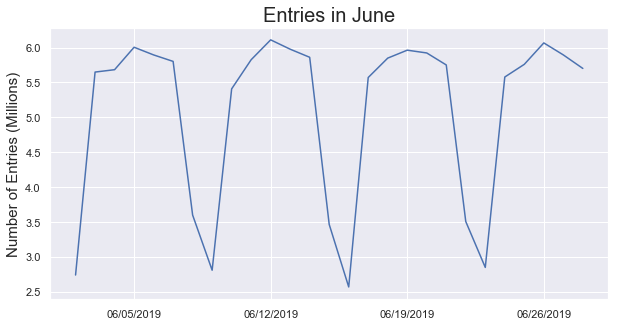

In [101]:
sns.set(rc={'figure.figsize':(10,5)})
sns.lineplot('DATE','byMil',data=byDate, palette='ch:2.5,.25',sort=False)
plt.xticks(x_labels)
plt.xlabel('')
plt.ylabel('Number of Entries (Millions)', fontdict={'fontsize':15})
plt.title('Entries in June',fontdict={'fontsize':20});

#### Observations:
- The peaks of daily entries on the line plot above are on 06/05, 06/12, 06/19, 06/26 - all those days are Wednesdays, which proves observations from EDA 2. 
- The highest peak of daily entries is on 06/12 - second week of the month. 
- The smallest number of daily entries is on 06/09, 06/16, 06/23 - all those dats are Sundays. 

### Top Stations with their median income

In [102]:
top20_stations = \
    (stations_daily.groupby(['STATION'])['DAILY_ENTRIES'].sum()
                   .reset_index()
                   .sort_values(by='DAILY_ENTRIES',ascending=False) 
                   .head(20))
top20_stations

# #top20_stations.to_csv('./top20_stations.csv') #save top 20 busiest station and use local data to find their zip code and median income



,STATION,DAILY_ENTRIES
61,34 ST-PENN STA,4079062.0
232,GRD CNTRL-42 ST,3552131.0
59,34 ST-HERALD SQ,2880825.0
46,23 ST,2697108.0
352,TIMES SQ-42 ST,2471003.0
14,14 ST-UNION SQ,2456006.0
225,FULTON ST,2315168.0
68,42 ST-PORT AUTH,2309401.0
110,86 ST,1969292.0
172,CANAL ST,1843473.0


In [103]:
#Link expires a week from July 6
df = pd.read_csv('https://s3.amazonaws.com/csvpastebin/uploads/9538d31d6e063fa4aea4ff0ae7cd9e5d/top20_stations_joined_with_income_data.csv') 

isRich = df['MEDIAN_HOUSEHOLD'] > 70000 # Filter for income greater than 70000
top20_stations_sorted = df[isRich].sort_values(by=['DAILY_ENTRIES', 'MEDIAN_HOUSEHOLD'], ascending=False)

top20_stations_sorted.head(5)

,STATION,DAILY_ENTRIES,ZIP_CODE,MEDIAN_HOUSEHOLD
0,34 ST-PENN STA,4079062.0,10001,71245
1,GRD CNTRL-42 ST,3552131.0,10017,102524
2,34 ST-HERALD SQ,2880825.0,10001,71245
3,23 ST,2697108.0,10010,93702
5,14 ST-UNION SQ,2456006.0,10003,89999


In [104]:
top10_stations_sorted = top20_stations_sorted.head(5)

Text(0.5, 1.0, 'The most populated stations by income')

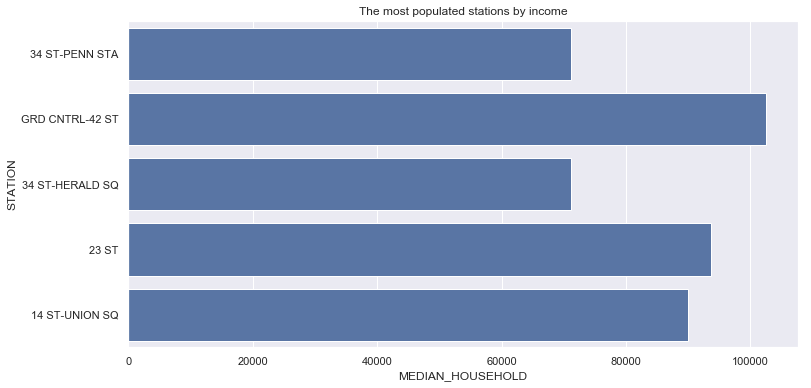

In [105]:
plt.figure(figsize=(12,6))
sns.barplot(data=top10_stations_sorted, x ='MEDIAN_HOUSEHOLD',y='STATION',color=base_color)
plt.title('The most populated stations by income')

### FINAL RECOMMENDATION